<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/econ_5200_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
student_basket=[
    {'Item':'Tuition','Price_2016':45000,'Price_2024':58000},
    {'Item':'Rent(1 Bed)','Price_2016':1200,'Price_2024':1800},
    {'Item':'Chipotle Burrito','Price_2016':7.50,'Price_2024':11.50},
    {'Item':'Coach Run','Price_2016':12,'Price_2024':17},
    {'Item':'Laptop','Price_2016':700,'Price_2024':900},
    {'Item':'Spotify','Price_2016':5,'Price_2024':7}
]

In [ ]:
def calculat_inflation(base,current):
  return((current-base)/base)*100
for item in student_basket:
  rate = calculat_inflation(item['Price_2016'],item['Price_2024'])
  print(f"{item['Item']}:{rate:.2f}% Inflation")

Tuition:28.89% Inflation
Rent(1 Bed):50.00% Inflation
Chipotle Burrito:53.33% Inflation
Coach Run:41.67% Inflation
Laptop:28.57% Inflation
Spotify:40.00% Inflation


In [ ]:
!pip install fredapi
from fredapi import Fred
fred = Fred('c3b49229ae543b42f8b6ba5671ac5aa6')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
official_cpi=fred.get_series('CPIAUCSL')
tuition=fred.get_series('CUSR0000SEEB')
rent=fred.get_series('CUSR0000SEHA')
coach_run=fred.get_series('CUSR0000SETB')
laptop=fred.get_series('CUSR0000SEEE')
chipotle_burrito=fred.get_series('CUSR0000SEFV')
spotify=fred.get_series('CUSR0000SERA02')

In [ ]:
df=pd.DataFrame({
    'Official_CPI':official_cpi,
    'Tuition_CPI':tuition,
    'Rent_CPI':rent,
    'Chipotle,Burrito_CPI':chipotle_burrito,
    'Coach Run_CPI':coach_run,
    'Laptop_CPI':laptop,
    'Spotify_CPI':spotify
})

In [ ]:
print(df)

            Official_CPI  Tuition_CPI  Rent_CPI  Chipotle,Burrito_CPI  \
1947-01-01        21.480          NaN       NaN                   NaN   
1947-02-01        21.620          NaN       NaN                   NaN   
1947-03-01        22.000          NaN       NaN                   NaN   
1947-04-01        22.000          NaN       NaN                   NaN   
1947-05-01        21.950          NaN       NaN                   NaN   
...                  ...          ...       ...                   ...   
2025-08-01       323.364      895.305   437.462               384.909   
2025-09-01       324.368      897.302   438.322               385.451   
2025-10-01           NaN          NaN       NaN                   NaN   
2025-11-01       325.031      902.001   438.875               387.202   
2025-12-01       326.030      903.402   440.034               389.889   

            Coach Run_CPI  Laptop_CPI  Spotify_CPI  
1947-01-01            NaN         NaN          NaN  
1947-02-01       

In [ ]:
Start_Date='2016-01-01'
Value_at_Start_Date=df.loc[Start_Date]

In [ ]:
Value_Current=df

In [ ]:
Value_Index=(Value_Current/Value_at_Start_Date)*100

In [ ]:
print(Value_Index)

            Official_CPI  Tuition_CPI    Rent_CPI  Chipotle,Burrito_CPI  \
1947-01-01      9.038426          NaN         NaN                   NaN   
1947-02-01      9.097336          NaN         NaN                   NaN   
1947-03-01      9.257233          NaN         NaN                   NaN   
1947-04-01      9.257233          NaN         NaN                   NaN   
1947-05-01      9.236194          NaN         NaN                   NaN   
...                  ...          ...         ...                   ...   
2025-08-01    136.066181   127.901262  149.969832            148.065841   
2025-09-01    136.488647   128.186549  150.264655            148.274337   
2025-10-01           NaN          NaN         NaN                   NaN   
2025-11-01    136.767627   128.857838  150.454234            148.947907   
2025-12-01    137.187989   129.057982  150.851560            149.981535   

            Coach Run_CPI  Laptop_CPI  Spotify_CPI  
1947-01-01            NaN         NaN         

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

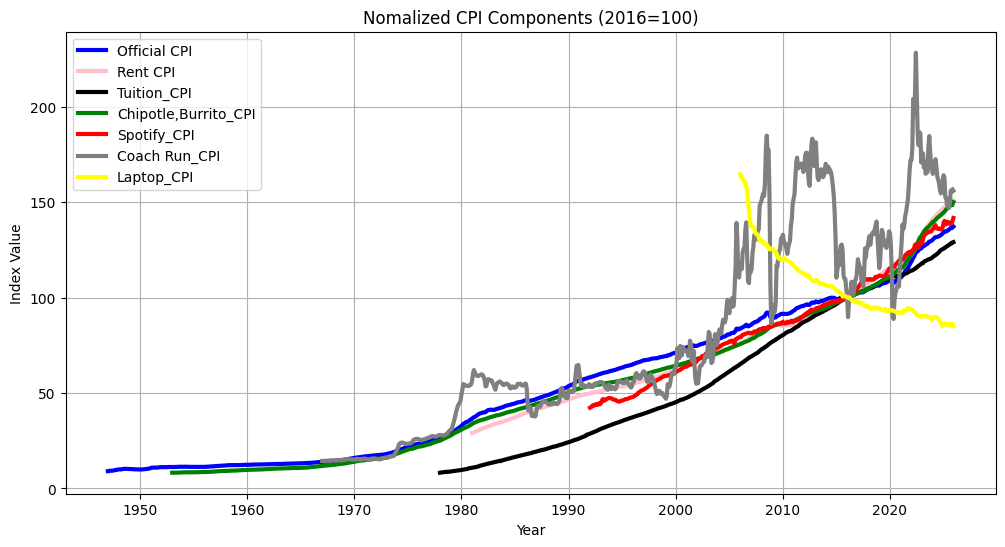

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Value_Index.index,Value_Index['Official_CPI'],label='Official CPI',color='blue',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Rent_CPI'],label='Rent CPI',color='pink',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Tuition_CPI'],label='Tuition_CPI',color='black',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Chipotle,Burrito_CPI'],label='Chipotle,Burrito_CPI',color='green',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Spotify_CPI'],label='Spotify_CPI',color='red',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Coach Run_CPI'],label='Coach Run_CPI',color='grey',linewidth=3)
plt.plot(Value_Index.index,Value_Index['Laptop_CPI'],label='Laptop_CPI',color='yellow',linewidth=3)
plt.title('Nomalized CPI Components (2016=100)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weigths = {
    'Tuition_CPI':0.40,
    'Rent_CPI':0.30,
    'Chipotle,Burrito_CPI':0.10,
    'Spotify_CPI':0.05,
    'Coach Run_CPI':0.05,
    'Laptop_CPI':0.05,
    'Official_CPI':0.05
}

In [ ]:
Value_Index['Student_CPI']=(
    Value_Index['Official_CPI']*weigths['Official_CPI']+
    Value_Index['Tuition_CPI']*weigths['Tuition_CPI']+
    Value_Index['Rent_CPI']*weigths['Rent_CPI']+
    Value_Index['Spotify_CPI']*weigths['Spotify_CPI']+
    Value_Index['Laptop_CPI']*weigths['Laptop_CPI']+
    Value_Index['Coach Run_CPI']*weigths['Coach Run_CPI']+
    Value_Index['Chipotle,Burrito_CPI']*weigths['Chipotle,Burrito_CPI']
)

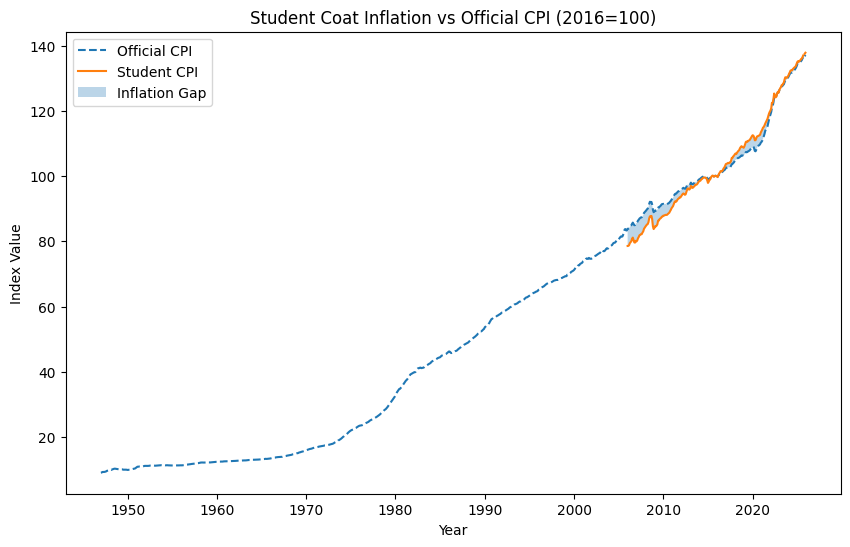

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Value_Index.index,Value_Index['Official_CPI'],label='Official CPI',linestyle='--')
plt.plot(Value_Index.index,Value_Index['Student_CPI'],label='Student CPI')
plt.fill_between(Value_Index.index,Value_Index['Official_CPI'],Value_Index['Student_CPI'],alpha=0.3,label='Inflation Gap')
plt.title('Student Coat Inflation vs Official CPI (2016=100)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.show()